In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
import seaborn as sbn

In [8]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-09-24 05:21:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.08s   

2019-09-24 05:21:19 (271 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [9]:
df = pd.read_csv('loan_train.csv')

In [10]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [11]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [17]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

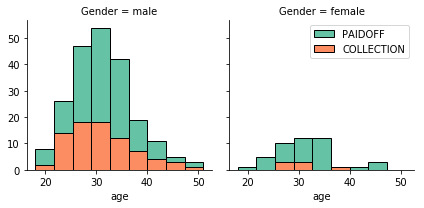

In [26]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
graph = sbn.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'age', bins=bins, ec="k")

graph.axes[-1].legend()
plt.show()

In [28]:
#women are more likely to pay their loans. Lets have a look at the months on which they pay their loans

In [36]:
df['dayofweek'] = df.effective_date.dt.dayofweek
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,day
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,8
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,8
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,8
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,9
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,9


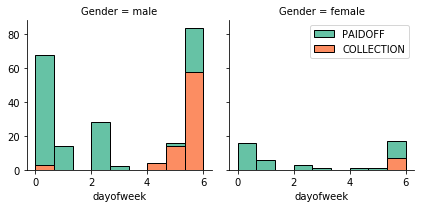

In [34]:
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sbn.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [37]:
df['month'] = df.effective_date.dt.month
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,day,month
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,8,9
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,8,9
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,8,9
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,9,9
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,9,9


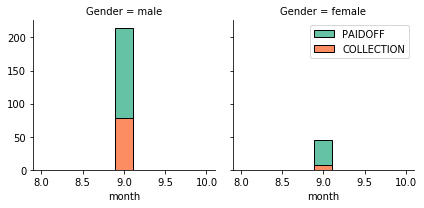

In [42]:
bins = np.linspace(df.month.min()-1, df.month.max()+1, 10)
g = sbn.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

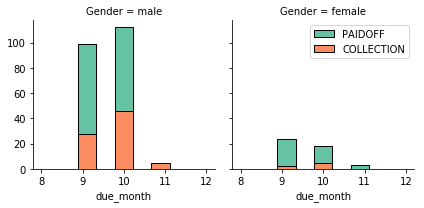

In [43]:
#this shows that most of the loans are to be paid back in the month of september.
df['due_month'] = df.due_date.dt.month
bins = np.linspace(df.due_month.min()-1, df.due_month.max()+1, 10)
g = sbn.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'due_month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [44]:
#since we saw that it was more probable for people to pay loan in the month of september and they are more likely to pay it back by 4th day of week, i.e. by Thrusday. Lets use Feature binarization to set a threshold values less then day 4.
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>4)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,day,month,due_month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,8,9,10,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,8,9,10,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,8,9,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,9,9,10,0
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,9,9,10,0


In [47]:
#lets check if education is adding value in categorisation
df.groupby(['education'])['loan_status'].value_counts()

education             loan_status
Bechalor              PAIDOFF         33
                      COLLECTION      11
High School or Below  PAIDOFF        112
                      COLLECTION      39
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               PAIDOFF        114
                      COLLECTION      35
Name: loan_status, dtype: int64

In [48]:
#there are just two cases of master or above. We can ignore this here.Lets use hot encoding to convert the features into binary.
Feature = df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,0,4,0,0,1
4,1000,30,29,0,0,4,0,0,1


In [49]:
#Lets encode our data labels as 0 and 1
y = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values
y[0:5]

array([0, 0, 0, 0, 0])

In [50]:
#Data normalisation
X=Feature
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.14984679,
        -0.26122054, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.14984679,
        -0.26122054,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.14984679,
        -0.26122054, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177, -1.14984679,
         0.12175534, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004, -1.14984679,
         0.12175534, -0.38170062, -0.87997669,  1.14984679]])

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25) #75 for training and 25% for testing
X_train.shape, y_train.shape
trainscores={}

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [71]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
trainscores['KNN Jaccard'] = jaccard_similarity_score(y_test, y_pred)
trainscores['KNN F1_score'] = f1_score(y_test, y_pred)
print("KNN Jaccard", trainscores['KNN Jaccard'])
print(trainscores['KNN F1_score'])

0.735632183908046
0.46511627906976744
